In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('cleaned_merged_heart_dataset.csv')

1. Neteja de dades:
Hi ha valors nuls al dataset? Si n'hi ha, com es poden gestionar?
Comprova si hi ha dades duplicades i, si existeixen, elimina-les.

In [56]:
# Identifiquem els valors nuls

null = df.isnull().sum()
print(null)
# Omplim els valors null
df.fillna(df.mean(), inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [57]:
# Mirem si hi ha duplicats, i els eliminem
duplicat = df.duplicated().sum()
print(f'Número de duplicats: {duplicat}')
df.drop_duplicates(inplace=True)

Número de duplicats: 0


2. Estadístiques descriptives:
Calcula la mitjana, mediana i desviació estàndard de les edats.
Quin és el nivell màxim i mínim de colesterol?

In [58]:
midjana = df['age'].mean()
mediana = df['age'].median()
desv = df['age'].std()
print(f'Mitjana: {midjana}')
print(f'Mediana: {mediana}')
print(f'Desviació estàndard: {desv}')

Mitjana: 54.4734219269103
Mediana: 55.0
Desviació estàndard: 9.039576023993696


In [59]:
max = df['chol'].max()
min = df['chol'].min()
print(f'Nivell màxim colesterol: {max}')
print(f'Nivell mínim colesterol: {min}')

Nivell màxim colesterol: 564
Nivell mínim colesterol: 126


3. Visualitzacions:
Crea un histograma de les edats per veure la distribució.
Crea un gràfic de barres per mostrar el nombre de pacients amb malaltia cardíaca (HeartDisease) segons el sexe.
Crea un gràfic de dispersió que mostri la relació entre colesterol i màxima freqüència cardíaca (MaxHR).

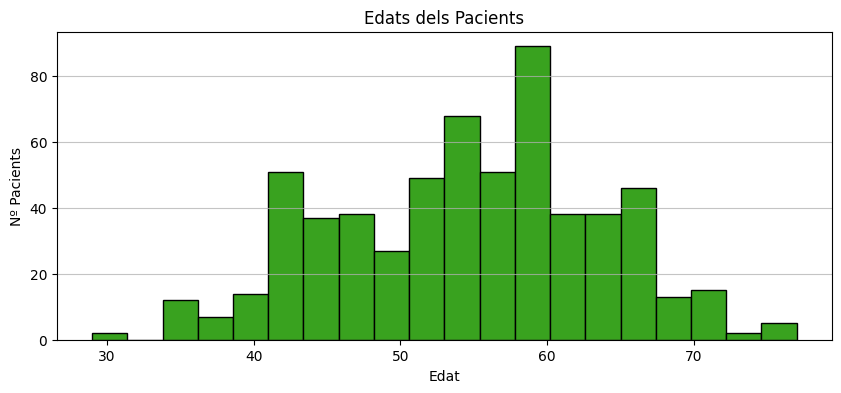

In [68]:
plt.figure(figsize=(10, 4))
plt.hist(df['age'], bins=20, color='#39a21f', edgecolor='black')
plt.title('Edats dels Pacients')
plt.xlabel('Edat')
plt.ylabel('Nº Pacients')
plt.grid(axis='y', alpha=0.75)
plt.show()

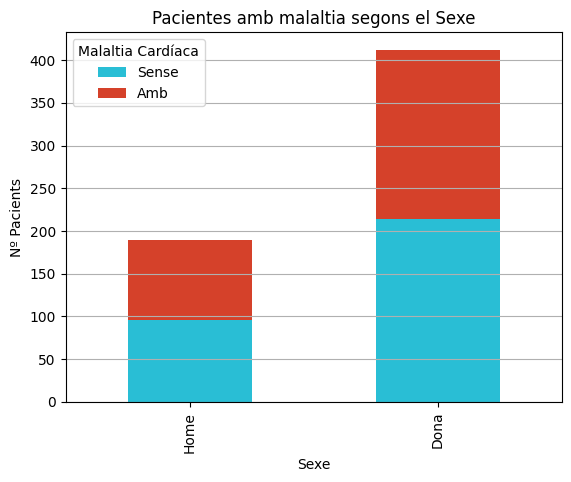

In [ ]:
count = df.groupby(['sex', 'target']).size().unstack()
count.plot(kind='bar', stacked=True, color=['#29bed5', '#d5412a'])
plt.title('Pacientes amb malaltia segons el Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nº Pacients')
plt.xticks(ticks=[0, 1], labels=['Home', 'Dona'])
plt.grid(axis='y')
plt.legend(title='Malaltia Cardíaca', labels=['Sense', 'Amb']);


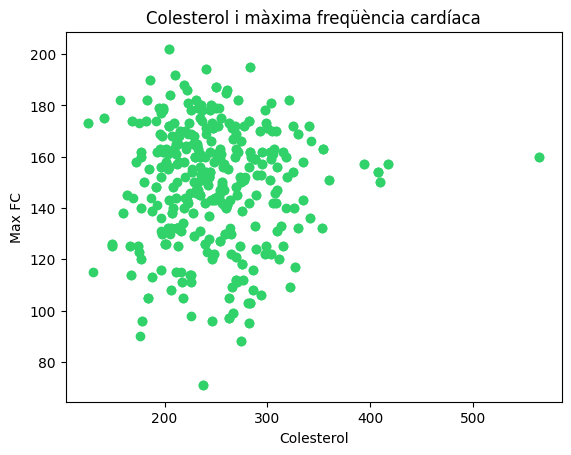

In [85]:
plt.scatter(df['chol'], df['thalachh'], color="#31d26a")
plt.title('Colesterol i màxima freqüència cardíaca')
plt.xlabel('Colesterol')
plt.ylabel('Max FC')
plt.show()